In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
all_tiff_files = []
listOfFiles = os.listdir('./clean_data/obj_test_res')
pattern = "*.tiff"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            all_tiff_files.append('./clean_data/obj_test_res/'+entry)

In [3]:
print(len(all_tiff_files))

42165


In [4]:
images_list = []
half_size = int(len(all_tiff_files) / 2)
max_size = 0
max_width = 0
max_height = 0
ind = 0
for i in range(half_size):
#    if(i == 25232):
#        print(all_tiff_files[i])
    im = Image.open(all_tiff_files[i])
    arr = np.array(im)#.flatten()
    #arr = np.expand_dims(arr, axis=1)
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list.append(arr)

for i in range(half_size, len(all_tiff_files)):
#    if(i == 25232):
#        print(all_tiff_files[i])
    im = Image.open(all_tiff_files[i])
    arr = np.array(im)#.flatten()
    #arr = np.expand_dims(arr, axis=1)
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list.append(arr)   

In [5]:
print(max_width, max_height, ind)
print(images_list[0])

27 140 7748
[[ 1560   260     0   624   164     0    64  1944   660     0]
 [ 1120     0     0    32     0     0     0  1666  1424   196]
 [   48     0     0     0     0     0     0   814  1606  1360]
 [    0     0     0   804   672   142     0     0     0     0]
 [    0     0   674  1390   944   836   636     0     0     0]
 [    0     0   730   748     0     0     0     0     0     0]
 [  960   798   152     0     0     0     0     0     0     0]
 [ 1900   884     0     0     0     0   198     0     0     0]
 [ 1112     0     0     0     0  1616  1502     0     0     0]
 [  304     0     0     0   306  3456  3062     0     0     0]
 [    0     0     0     0  1726  6322  5726  1588     0     0]
 [    0     0     0     0  3408  9158  7870  2618     0     0]
 [    0     0     0     0  3538 10188  8222  1618     0     0]
 [    0     0     0     0  2872 10400  8268   410     0     0]
 [    0     0     0     0  3316 10988  8758   298     0     0]
 [  356     0     0     0  3764 10520  8044

In [6]:
for i in range(len(images_list)):
    s = images_list[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list[i] = arr
    
    #if i == 1024:
    #    plt.imshow(arr)
    

In [7]:
width = max_width
height = max_height
print(width, height)

27 140


In [133]:
#plt.imshow(images_list[74])

In [24]:
#min_max_scaler = preprocessing.MinMaxScaler()
images_np = np.array(images_list)
images_np /= 0xffff
#X_train_minmax = min_max_scaler.fit_transform(images_np)
X_train, X_test = train_test_split(images_np, test_size=0.33, random_state=100)

In [25]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (28250, 140, 27)
28250 train samples
13915 test samples


In [34]:
X_train = X_train.reshape(28250, 140, 27, 1)

In [35]:
X_test = X_test.reshape(13915, 140, 27, 1)

In [15]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14517204692061540317
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1441641267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13310348708585866977
physical_device_desc: "device: 0, name: GeForce GTX 750 Ti, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [59]:
input_img = Input(shape=(height, width, 1))
x = Conv2D(64, (2, 2), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 1))(x)
x = Conv2D(32, (2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 1))(x)
x = Conv2D(16, (2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((5, 1))(x)

x = Conv2D(16, (2, 2), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((5, 1))(x)
x = Conv2D(32, (2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 1))(x)
x = Conv2D(64, (2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 1))(x)
x = Conv2D(1, (2, 2), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('relu')(x)

In [60]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='MSE')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 140, 27, 1)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 140, 27, 64)       320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 140, 27, 64)       256       
_________________________________________________________________
activation_22 (Activation)   (None, 140, 27, 64)       0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 70, 27, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 70, 27, 32)        8224      
_________________________________________________________________
batch_normalization_23 (Batc (None, 70, 27, 32)        128       
__________

In [64]:
history = model.fit(X_train[:500], X_train[:500],
                    batch_size=1024,
                    epochs=1000,
                    verbose=1,
                    validation_data=(X_test[:100], X_test[:100]),
                    shuffle=True)

Train on 500 samples, validate on 100 samples
Epoch 1/1000


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[500,64,140,27] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_5/Adam/gradients/zeros_25}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[loss_5/mul/_1585]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[500,64,140,27] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_5/Adam/gradients/zeros_25}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

In [55]:
test_img = X_test[1].reshape(140, 27)

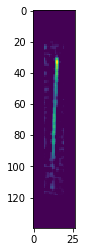

In [56]:
plt.imshow(test_img)

In [57]:
result_img = model.predict(X_test[1].reshape(1, 140, 27, 1))

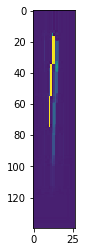

In [58]:
plt.imshow(result_img.reshape(140, 27))